In [18]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

# ! pip install finance-datareader

# ! pip install mpl-finance
# ! pip install wordcloud matplotlib
# ! pip install squarify
# ! pip install xlrd



In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import FinanceDataReader as fdr
import time
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
import squarify

# # 윈도우 버전
# plt.rcParams['font.family'] = 'Malgun Gothic'
# 맥 버전
plt.rcParams['font.family'] = 'AppleGothic'  # 또는 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 1. 2017년 도널드 트럼프 취임과 섹터별 주가 변화 분석

**📌 기획 의도**     
2017년 도널드 트럼프 대통령의 취임은 글로벌 경제와 금융 시장에 상당한 영향을 미쳤습니다. 트럼프 행정부는 감세 정책, 보호무역주의, 인프라 투자 확대 등의 경제 공약을 내세우며 미국 중심의 경제정책을 추진했습니다. 이에 따라 글로벌 금융 시장과 한국 주식시장(KRX)도 정책 변화에 따라 민감하게 반응했을 것으로 예상됩니다.    
      
본 프로젝트는 2017년 트럼프 취임 이후 한국 주요 섹터별 주가 변화 및 거래량 추이를 분석하여 다음과 같은 질문에 대한 인사이트를 도출하는 것을 목표로 합니다.     
       
트럼프의 경제 정책이 한국 주식시장(KRX)에서 특정 섹터에 미친 영향은 무엇인가?     
반도체, 자동차, 철강, 은행, 미디어/IT, 필수소비재, 에너지, 헬스케어 등의 핵심 산업별 주가는 2017년 한 해 동안 어떻게 변화했는가?     
어떤 섹터가 가장 큰 거래량을 기록했으며, 시장에서 주목받은 업종은 무엇인가?     
정책 변화에 대한 투자자의 반응은 거래량과 주가 변동성에 어떤 패턴을 보였는가?      
이 분석을 통해 트럼프 행정부의 정책이 한국 시장의 주요 섹터별 주가와 거래량에 미친 영향을 객관적으로 분석하고, 향후 글로벌 정책 변화가 국내 금융시장에 미치는 영향을 예측하는 데 활용할 수 있도록 합니다.      
       
**🎯 프로젝트 목표**      
1️⃣ 섹터별 주가 변화 분석     
2017년 1월~12월 동안 각 섹터별 월별 평균 종가(Close Price) 변화를 추적하여 트럼프 취임 후 주가 변동성을 파악합니다.      
Min-Max Scaling을 적용하여 섹터별 상대적인 주가 변화를 쉽게 비교할 수 있도록 정규화합니다.    
       
2️⃣ 섹터별 거래량 분석      
2017년 한 해 동안 각 섹터의 총 거래량을 분석하여 투자자들의 관심이 집중된 업종을 확인합니다.      
섹터별 거래량 비중을 분석하고, 가장 활발하게 거래된 산업과 그렇지 않은 산업을 비교합니다.      
워드클라우드와 버블 차트(Bubble Chart)를 활용하여 시각적으로 직관적인 거래량 비교를 수행합니다.      
        
3️⃣ 데이터 시각화를 통한 인사이트 도출      
선 그래프(Line Plot): 2017년 각 섹터의 주가 변동성 시각화      
막대그래프(Bar Chart): 거래량 비중을 비교하여 가장 활발했던 섹터 확인       
버블 차트(Bubble Chart): 거래량이 많았던 섹터를 크기와 색상으로 직관적으로 표현     
워드클라우드(WordCloud): 2017년 주목받은 섹터를 강조하여 시각적 인사이트 제공       
         
4️⃣ 정책 변화와 금융 시장 반응 간의 관계 분석      
주가 변동과 거래량의 변화를 바탕으로,      
트럼프 행정부의 경제 정책 발표 시점과 특정 섹터의 주가 및 거래량 변동 간의 상관관계를 탐색합니다.      
이를 통해 향후 글로벌 경제 정책이 한국 금융 시장에 미치는 영향 예측에 도움을 줄 수 있는 모델을 구축합니다.     
       
**📈 기대 효과 및 활용 방안**      
1️⃣ 정책 변화에 따른 시장 반응 예측       
트럼프 행정부의 주요 정책(감세, 보호무역, 인프라 투자)과 국내 주식시장 반응을 분석하여 향후 글로벌 정책 변화 시 한국 시장의 대응 방향을 예측하는 데 활용할 수 있습니다.      
     
2️⃣ 투자 전략 수립을 위한 기초 데이터 제공     
거래량과 주가 변동을 기반으로, 특정 정책이 어떤 산업에 긍정적/부정적 영향을 주었는지 데이터 기반 분석이 가능합니다.     
투자자들은 비슷한 정책이 시행될 경우 어느 섹터가 유망할지 판단하는 자료로 활용할 수 있습니다.      
     
3️⃣ 기업 및 기관의 리스크 관리 및 시장 대응 전략 지원      
국내 기업 및 금융기관이 국제 경제정책 변화에 따른 시장 변동성을 사전에 감지하고 위험을 최소화할 전략을 수립하는 데 참고할 수 있습니다.      
       
**📌 결론**   
본 프로젝트는 2017년 도널드 트럼프 대통령 취임이 한국 주식시장에 미친 영향을 섹터별 주가 및 거래량 변화 분석을 통해 정량적으로 평가하는 것을 목표로 합니다.     
이를 통해 글로벌 경제 정책이 각 산업에 미치는 영향을 체계적으로 이해하고, 향후 비슷한 정책 변화에 대한 시장 반응을 예측하는 데 활용할 수 있는 인사이트를 제공합니다.       

In [20]:
# 반도체, 자동차, 철강, 은행, 미디어/IT, 필수소비재, 에너지, 헬스케어 섹터 
dic={'automobile': '091180',
'steel': '117680',
'semiconduct': '091160',
'bank': '091170',
'media_it': '266410',
'essential_consumer': '139260',
'energy': '117690',
'healthcare': '143860'}

In [21]:
for sector, code in dic.items():
    data = fdr.DataReader(code) # ETF 종목 코드
    data.to_csv(f'prac/{sector}.csv') # 각 섹터 주가 데이터 저장

In [22]:
# min-max scaler 정규화
def normalize_close(summary):
    # Min-Max 정규화 수행: 정규화된 값을 'Close_norm' 칼럼에 저장
    close_min = summary['Close'].min()
    close_max = summary['Close'].max()
    summary['Close_norm'] = (summary['Close'] - close_min) / (close_max - close_min)
    
    return summary

for sector in dic.keys():
    # 각 섹터의 데이터를 호출
    data_stock_2017 = pd.read_csv(f'prac/{sector}.csv')
    # Date 컬럼을 날짜 형식으로 변환
    data_stock_2017['Date'] = pd.to_datetime(data_stock_2017['Date'])
    # 2017년 데이터 필터링
    data_stock_2017 = data_stock_2017[data_stock_2017['Date'].dt.year == 2017]
    # Month 칼럼 추가
    data_stock_2017['Month'] = data_stock_2017['Date'].dt.month
    # 월별 그룹화 및 Close 평균, Volume 합 구하기
    summary = data_stock_2017.groupby('Month').agg({'Close':'mean','Volume':'sum'}).reset_index()
    summary = normalize_close(summary)
    summary.to_csv(f'prac/2017_{sector}.csv')

## 2017년 월별 종가 min_max Scailing 시각화

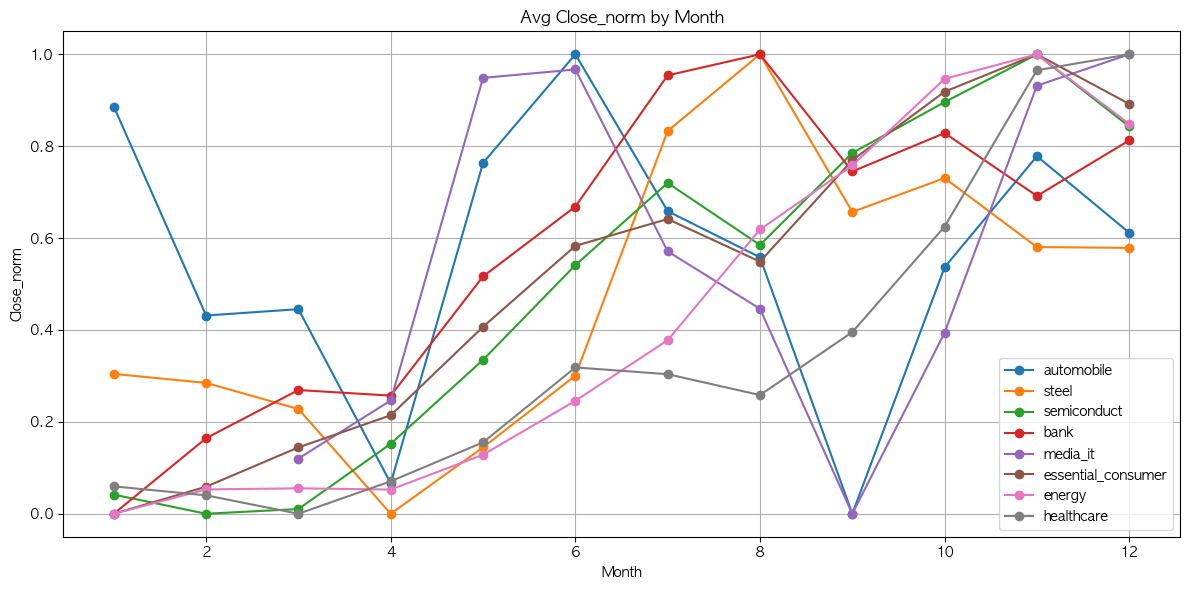

In [23]:
# 📊 그래프 그리기
plt.figure(figsize=(12, 6))
# plt.plot(df_automobile['Year'], df_automobile['Close'], marker='o', linestyle='-', label='automobile 평균 종가')  

for sector in dic.keys():
    # 각 섹터의 데이터를 호출
    data_stock_2017 = pd.read_csv(f'prac/2017_{sector}.csv')
    plt.plot(data_stock_2017['Month'], data_stock_2017['Close_norm'], marker='o', label=sector)

plt.title("Avg Close_norm by Month")
plt.xlabel("Month")

plt.ylabel("Close_norm")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 버블 차트로 섹터별 거래량 시각화

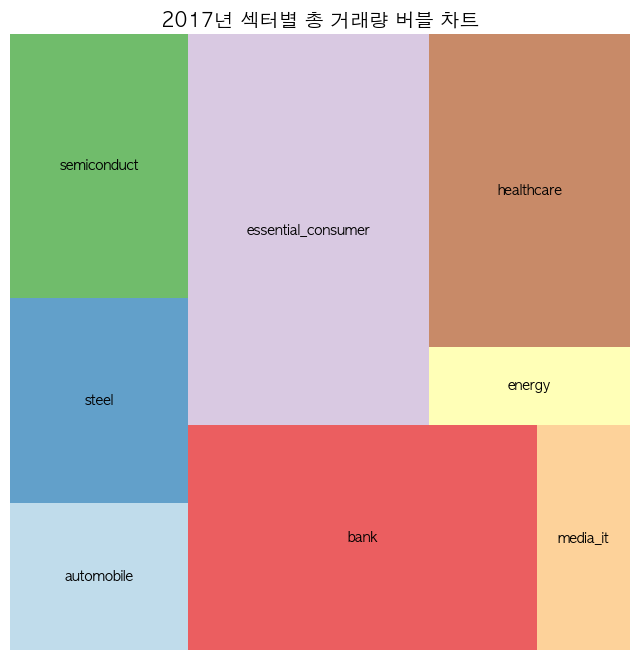

In [24]:
# 거래량 데이터 예시 (sector_volume)
sector_volume = {
    'automobile': 5000000,
    'steel': 7000000,
    'semiconduct': 9000000,
    'bank': 15000000,
    'media_it': 4000000,
    'essential_consumer': 18000000,
    'energy': 3000000,
    'healthcare': 12000000
}

# 데이터 준비
sector_names = sector_volume.keys()  # 섹터 이름
volume_values = sector_volume.values()  # 거래량

# 정규화된 크기 계산
sizes = [v / max(volume_values) * 100 for v in volume_values]  # 원 크기 조절

# 색상 지정
colors = plt.cm.Paired(np.linspace(0, 1, len(sector_names)))

# 버블 차트 생성
plt.figure(figsize=(8, 8))
squarify.plot(sizes=sizes, label=sector_names, color=colors, alpha=0.7)

# 제목 추가 및 축 제거
plt.title("2017년 섹터별 총 거래량 버블 차트", fontsize=14)
plt.axis('off')

# 차트 표시
plt.show()

## 거래량 비중(%) 추가 + 데이터프레임 정리

In [25]:
# sector_volume 딕셔너리 → 데이터프레임
volume_df = pd.DataFrame(sector_volume.items(), columns=['Sector', 'TotalVolume'])

# 총합 기준 비중 계산
volume_df['VolumeRatio(%)'] = (volume_df['TotalVolume'] / volume_df['TotalVolume'].sum()) * 100

# 보기 좋게 소수점 2자리로 반올림
volume_df['VolumeRatio(%)'] = volume_df['VolumeRatio(%)'].round(2)

# 거래량 기준 내림차순 정렬
volume_df = volume_df.sort_values(by='TotalVolume', ascending=False).reset_index(drop=True)

volume_df


,Sector,TotalVolume,VolumeRatio(%)
0,essential_consumer,18000000,24.66
1,bank,15000000,20.55
2,healthcare,12000000,16.44
3,semiconduct,9000000,12.33
4,steel,7000000,9.59
5,automobile,5000000,6.85
6,media_it,4000000,5.48
7,energy,3000000,4.11


## 막대그래프로 시각화

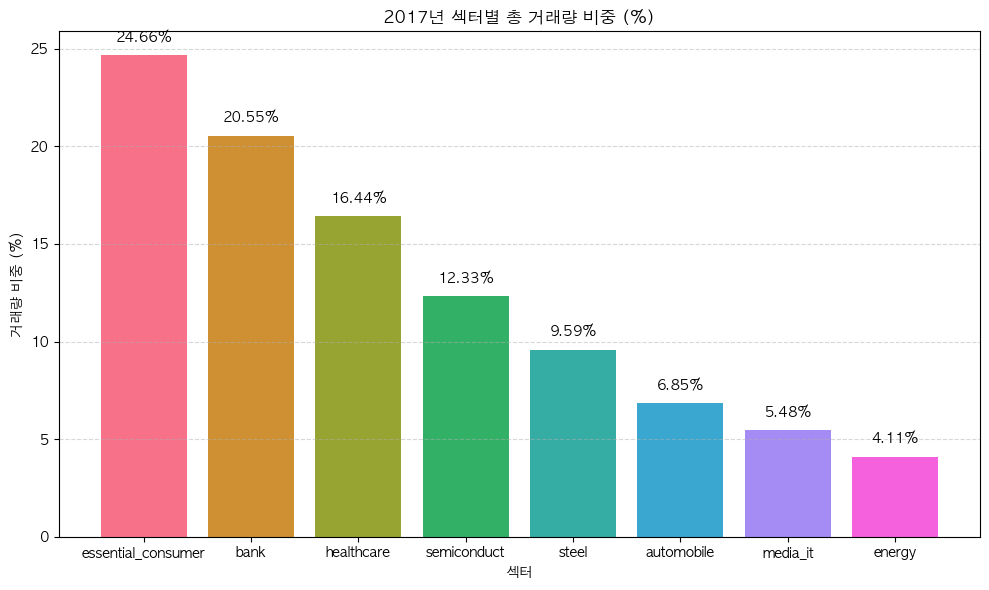

In [26]:
# 색상 팔레트 설정
colors = sns.color_palette("husl", len(volume_df))  # "husl" 팔레트 사용 (다양한 색)

plt.figure(figsize=(10, 6))
bars = plt.bar(volume_df['Sector'], volume_df['VolumeRatio(%)'], color=colors)  # 개별 색 적용

# 막대 위에 비율 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height}%', ha='center', va='bottom')

plt.title('2017년 섹터별 총 거래량 비중 (%)')
plt.ylabel('거래량 비중 (%)')
plt.xlabel('섹터')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 2. 매년 종가와 수출량의 상관관계

📌 프로젝트 기획 의도 및 목표      
      
1. 프로젝트 개요    
본 프로젝트는 매년 주식 시장의 평균 종가(Close)와 국가 총 수출액(Total Export) 간의 관계를 분석하여, 특정 산업의 성장과 국가 경제 활동 간의 상관관계를 탐색하는 것을 목표로 진행      
이를 통해, 개별 산업이 수출 증가에 따라 어떤 영향을 받는지를 시각적으로 분석하고, 기업과 투자자들에게 데이터 기반의 의사결정 지표를 제공    
      
2. 프로젝트 목표        
✅ 주요 산업별 주가 변동 분석        
자동차, 은행, 데이터, 에너지, 필수 소비재, 헬스케어, 반도체, 철강 등 8개 주요 산업군의 연평균 종가 변화를 분석     
산업별 주가가 특정 연도에 어떻게 변화했는지를 파악하여, 산업 트렌드 및 시장 흐름을 이해하는 데 활용     
✅ 수출량과 주식시장 간의 관계 분석         
국가 총 수출액의 변화가 특정 산업에 미치는 영향을 탐색     
글로벌 경제 환경, 정책 변화, 무역협정 등이 산업 성장과 주가 변동성에 미치는 영향을 분석하는 데 활용될 수 있음을 파악    
✅ 기업의 전략적 의사결정 지원           
기업들이 수출 의존도가 높은 산업의 경우, 수출 동향을 기반으로 한 투자 및 경영 전략 수립이 가능하도록 지원     
경제 변동성과 산업별 민감도를 고려하여, 장기적인 시장 예측 및 투자 전략을 세울 수 있도록 데이터 인사이트를 제공     
     
📊 최종 분석 결과 및 인사이트      
1. 산업별 평균 종가 변화     
특정 산업(예: 반도체, 자동차)은 수출량 증가와 함께 평균 종가가 상승하는 경향을 확인     
반면, 은행 및 필수 소비재(essential consumer) 산업은 상대적으로 낮은 변동성 확인     
2018년~2019년 글로벌 무역전쟁 시기에는 대부분 산업에서 하락세가 관찰되었으며, 이후 회복세를 보인 산업이 있는 반면, 일부는 지속적인 하락을 확인    
      
2. 총 수출액 변화와 주가 간의 상관관계     
총 수출액은 전반적으로 상승하는 경향을 보이지만, 일부 연도(예: 2015년, 2020년)에는 하락세를 확인    
특정 연도에 수출량 감소와 동시에 특정 산업(철강, 에너지)의 평균 종가도 하락하는 패턴을 관찰      
반도체와 자동차 산업은 수출량 증가와 함께 주가가 동반 상승하는 경향을 나타내어, 글로벌 수출 시장과 밀접한 관련이 있음을 시사         
      
🔍 결론 및 시사점        
본 프로젝트를 통해 수출량과 산업별 평균 종가 간의 관계를 데이터 기반으로 분석      
이 분석 결과는 기업의 수출 전략, 투자자의 산업 선택, 정책 결정자들의 경제 정책 수립에 활용 가능       
       
특히, 다음과 같은 전략적 인사이트를 제공      
✅ 수출 중심 산업(예: 반도체, 자동차) → 수출 정책 변화에 민감하므로 글로벌 경제 트렌드 모니터링 필수      
✅ 내수 중심 산업(예: 필수 소비재, 은행) → 경제 위기 시 방어적 투자 포트폴리오 구성 가능       
✅ 특정 연도에 주가 및 수출량 변동성 증가 → 경제 이벤트(예: 금융 위기, 팬데믹, 무역 분쟁)와의 상관관계 추가 분석 필요          
       
이러한 분석을 바탕으로, 향후 수출량 예측과 산업별 주가 변동성을 조합한 예측 모델을 개발 가능

- 자동차, 은행, 데이터, 에너지, 필수 소비재, 헬스케어, 반도체, 철강 필요 데이터 정리

In [28]:
sectors=['automobile','bank','energy','essential_consumer','healthcare','semiconduct','steel']

In [29]:
for sector in sectors:

    file_path=f"prac/{sector}.csv"
    df = pd.read_csv(file_path)

    # Date 컬럼을 날짜 형식으로 변환
    df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")

    # 월별 그룹화 및 Close 평균, Volume 합 구하기
    df_grouped = df.groupby(df["Date"].dt.year).agg(
        {"Close": "mean"}
    ).reset_index()

    # Date -> Year 변경
    df_grouped.rename(columns={"Date": "Year"}, inplace=True)

    df_Year = df_grouped[df_grouped["Year"]>=2011]

    # CSV 파일로 저장
    output_path = f"prac/{sector}_by_Year.csv"
    df_Year.to_csv(output_path, index=False)

- 수출량 데이터 정리

In [ ]:
df_export=pd.read_excel("prac/K_stat_무역통계_한국무역협회_final.xls", header=2)

# 칼럼명 변경
df_export.rename(columns={"년도\n(순위)": "Year", "총수출액\n(백만불)": "Total_export"}, inplace=True)

In [31]:
# "Year" 컬럼을 정수형으로 변환
df_export["Year"] = df_export["Year"].astype(str).str.extract(r'(\d{4})')  # 연도 추출
df_export["Year"] = df_export["Year"].astype(int)  # 정수형 변환

# 2011년부터 2025년 데이터만 필터링
df_filtered = df_export[(df_export["Year"] >= 2011)&(df_export["Year"]<2025)]

# 필요한 컬럼만 선택
df_final = df_filtered[["Year", "Total_export"]]

## 산업별 종가와 한국 수출량 그래프 확인
- 산업 민감도 분석 : 특정 산업이 수출 트렌드에 민감하게 반응하는지 파악 가능
- 시계열 비교 분석 : 수출과 주가의 변곡점이 일치하는 구간을 탐색하여 연관성 판단

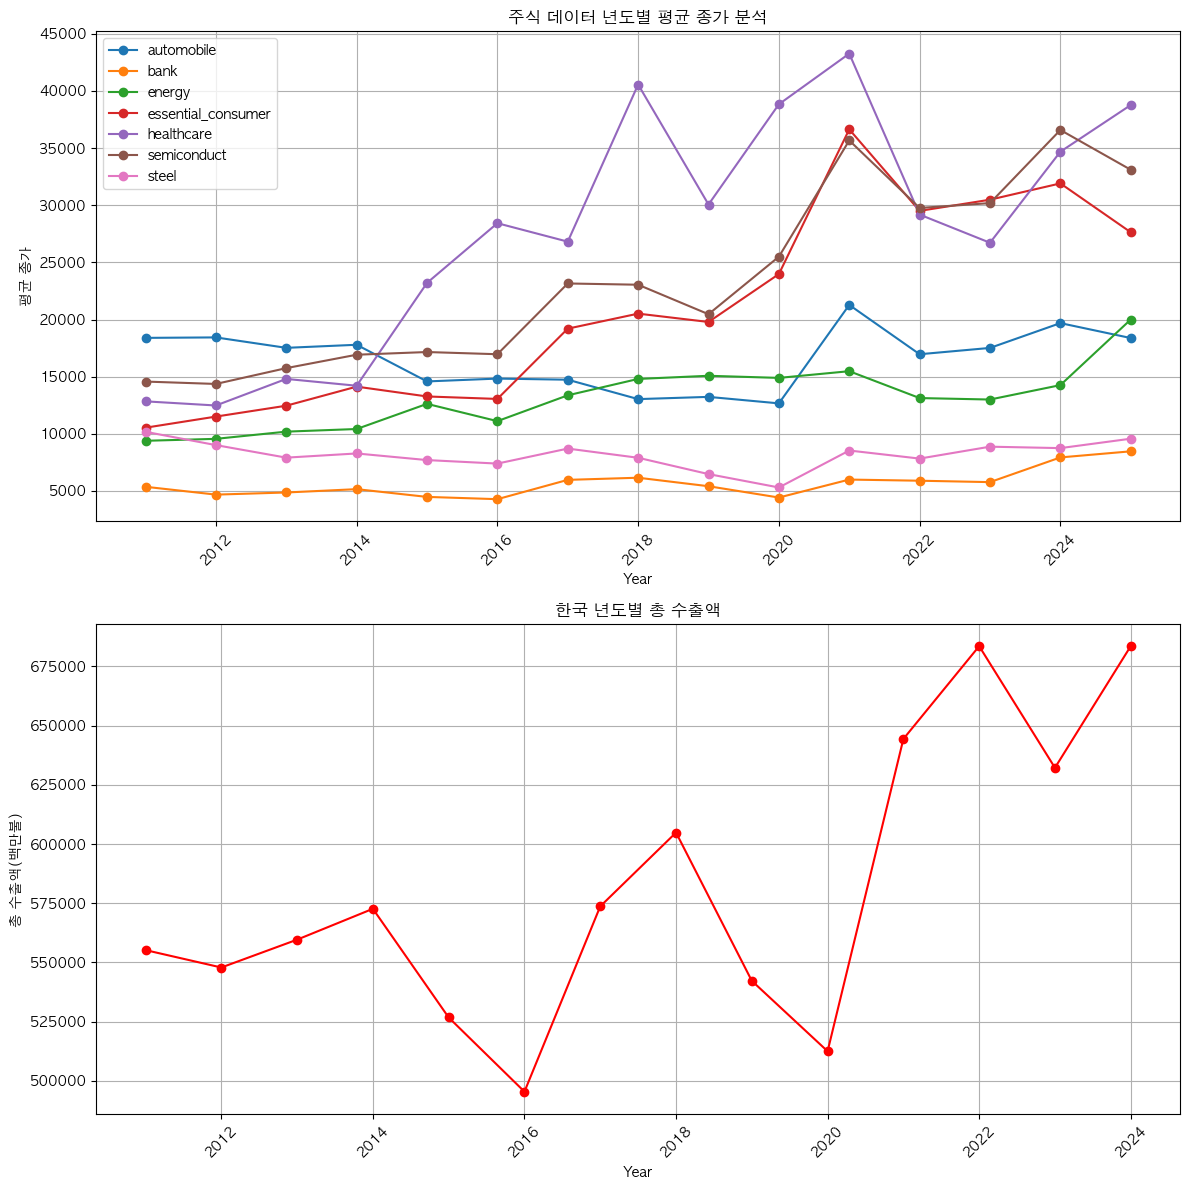

In [32]:
# 📌 **subplot 설정**
fig, axes = plt.subplots(2, 1, figsize=(12, 12))  # 2개의 그래프 (2행 1열)

# 📌 **첫 번째 그래프: 주식 데이터 년별 평균 종가 분석**
for sector in sectors:
    df = pd.read_csv(f'prac/{sector}_by_Year.csv')
    axes[0].plot(df['Year'], df['Close'], marker='o', linestyle='-', label=sector)

# 📌 **첫 번째 그래프 설정**
axes[0].set_title('주식 데이터 년도별 평균 종가 분석')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('평균 종가')
axes[0].legend()
axes[0].grid(True)
axes[0].tick_params(axis='x', rotation=45)  # X축 라벨 회전

# 📌 **두 번째 그래프: 한국 년도별 총 수출액**
axes[1].plot(df_final['Year'], df_final['Total_export'], marker='o', linestyle='-', color='red')

# 📌 **두 번째 그래프 설정**
axes[1].set_title('한국 년도별 총 수출액')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('총 수출액(백만불)')
axes[1].grid(True)
axes[1].tick_params(axis='x', rotation=45)  # X축 라벨 회전

# 📌 **레이아웃 조정**
plt.tight_layout()

# 📌 **그래프 출력**
plt.show()

## 상관관계 분석 (Correlation Analysis)
- 수출 총액과 산업별 종가 간의 상관성 수치 확인
- 밀접한 산업 파악
- 어떤 산업이 한국의 수출 흐름과 유의미하게 같이 움직이는지 파악
- 가장 높은 상관관계를 보이는 산업을 선별해 추가 분석 대상 산업으로 활용 가능

In [33]:
merged_df = df_final.copy()
for sector in sectors:
    df_sector = pd.read_csv(f'prac/{sector}_by_Year.csv')
    merged_df = pd.merge(merged_df, df_sector[['Year', 'Close']], on='Year', how='left')
    merged_df.rename(columns={'Close': f'{sector}_Close'}, inplace=True)

# 상관관계 분석
correlations = merged_df.drop(columns='Year').corr()
print(correlations['Total_export'].sort_values(ascending=False))


Total_export                1.000000
bank_Close                  0.843117
semiconduct_Close           0.790317
essential_consumer_Close    0.771673
automobile_Close            0.555034
steel_Close                 0.383224
energy_Close                0.355861
healthcare_Close            0.335051
Name: Total_export, dtype: float64


## 산업별 종가 대비 수출 추세 비교 시각화
- 종가/수출액 변화율 비교 그래프	
- 민감도/변동성 확인
- 급등/급락 시점이 일치하는 산업이 있는지 확인 => 경기 민감 산업 탐색 가능

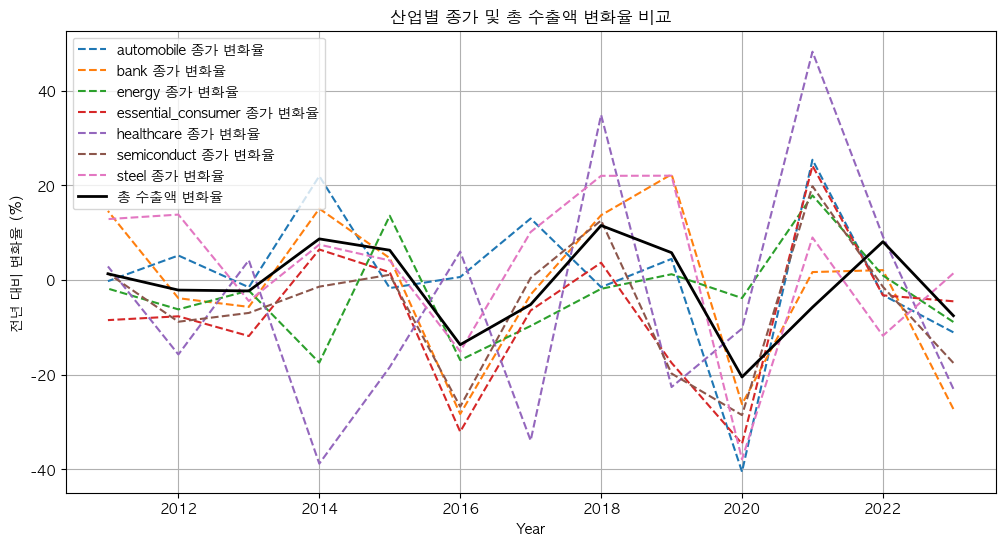

In [ ]:
df_rate = merged_df.copy()
df_rate.set_index('Year', inplace=True)
df_rate = df_rate.pct_change().dropna() * 100  # 전년 대비 변화율 (%)

# 시각화
plt.figure(figsize=(12, 6))
for sector in sectors:
    plt.plot(df_rate.index, df_rate[f'{sector}_Close'], linestyle='--', label=f'{sector} 종가 변화율')
plt.plot(df_rate.index, df_rate['Total_export'], color='black', linewidth=2, label='총 수출액 변화율')
plt.title('산업별 종가 및 총 수출액 변화율 비교')
plt.xlabel('Year')
plt.ylabel('전년 대비 변화율 (%)')
plt.legend()
plt.grid(True)
plt.show()
